## Music & Mental Health

This project is to review a survey dataset and spotify music dataset to determine if one genre is the best genre when it comes to improvement in mood when listening to music. 


#### Best Practice

Be sure to set up a virtual environment as there were lots of imports in this project
| Command | Linux/Mac | GitBash |
| ------- | --------- | ------- |
| Create  | python3 -m venv venv | python -m venv venv |
| Activate | source venv/bin/activate | source venv/Scripts/activate |
| Install | pip install -r requirements.txt or pip install packages | pip install -r requirements.txt or pip install packages|
| Deactivate | deactivate | deactivate |

In [2]:

# Import pandas numpy, sqlite3, seaborn, matplotlib, scipy, statsmodels, wave, ffmpeg, statsmodel
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as stats 
from itertools import combinations
import ipywidgets as widgets
from IPython.display import display
import wave
import ffmpeg
import os
from IPython.display import Audio


## Music & Mental Health Survey

Below is the import of the Kaggle API to download the dataset for the music mental health survey.

In [3]:
# Import Kagglehub API and get data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path)

Path to dataset files: /Users/luckyc/.cache/kagglehub/datasets/catherinerasgaitis/mxmh-survey-results/versions/1


In [4]:
# Create a dataframe from CSV obtained in kagglehub API for survey results 
survey = pd.read_csv("mxmh_survey_results.csv")

# Show first two lines
survey.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


### Updates to the csv

I used DBBrowser for SQLite to process the mxmh_survey_results.csv file, removing unnecessary columns and filtering the PrimaryStreamingService to only include Spotify. I focused on Spotify to ensure the survey data aligned with my other Spotify dataset for more accurate comparison.

In [5]:
# reading in survey data manipulated in sql to have columns wanted
survey_sql = pd.read_csv("mxmh_survey.csv")

# Show the first two lines
survey_sql.head(2)

,Age,Primarystreamingservice,Favgenre,BPM,Anxiety,Depression,Insomnia,OCD,Musiceffects
0,18.0,spotify,latin,156.0,3.0,0.0,1.0,0.0,NaN
1,18.0,spotify,video game music,132.0,7.0,7.0,10.0,2.0,No effect


### Cleaning the survey dataframe

Below I am checking for null values, removing any found, and verifying that the null values are no longer available.

In [6]:
# Check for isnull
survey_sql.isnull().any().any()

np.True_

In [7]:
# Checking where isnull values are located
survey_sql.isnull().sum()

Age                         1
Primarystreamingservice     0
Favgenre                    0
BPM                        56
Anxiety                     0
Depression                  0
Insomnia                    0
OCD                         0
Musiceffects                3
dtype: int64

In [8]:
# removing isnull items and reseting index as well and renaming with _cleaned
survey_sql_cleaned = survey_sql.dropna().reset_index(drop=True)

In [9]:
survey_sql_cleaned.head(2)

,Age,Primarystreamingservice,Favgenre,BPM,Anxiety,Depression,Insomnia,OCD,Musiceffects
0,18.0,spotify,video game music,132.0,7.0,7.0,10.0,2.0,No effect
1,18.0,spotify,r&b,107.0,7.0,2.0,5.0,9.0,Improve


In [10]:
# reading in survey data manipulated in sql to have columns wanted
survey_db_counts = pd.read_csv('survey_db_update.csv')

# Show the first two lines
survey_db_counts.head(2)


,Primarystreamingservice,Favgenre,improve_count,worsen_count,no_effect_count,total_count
0,spotify,classical,17,1,7,25
1,spotify,country,12,0,3,15


In [11]:
# checking for null

survey_db_counts.isnull().any().any() 

np.False_

### Calculation and Statistical Review

1. Created a function to calculate the percentage for improve, worsen and no_effect. 
2. Using a confidence interval to assess whether one music genre can be statistically identified as the most effective for improving mood.

In [12]:

# calulate the percentage of improve count, worsen count, and no effect count against total count
def calculate_percentage(survey_db_counts):
    # Calculate percentages
    survey_db_counts['improve_percentage'] = ((survey_db_counts['improve_count'] / survey_db_counts['total_count']) * 100).round(2)
    survey_db_counts['worsen_percentage'] = ((survey_db_counts['worsen_count'] / survey_db_counts['total_count']) * 100).round(2)
    survey_db_counts['no_effect_percentage'] = ((survey_db_counts['no_effect_count'] / survey_db_counts['total_count']) * 100).round(2)

    # Return the DataFrame with the new columns
    return survey_db_counts[['Favgenre', 'total_count', 'improve_percentage', 'worsen_percentage', 'no_effect_percentage']]


In [13]:
# call the percentage function

percentages = calculate_percentage(survey_db_counts)

percentages

,Favgenre,total_count,improve_percentage,worsen_percentage,no_effect_percentage
0,classical,25,68.00,4.00,28.00
1,country,15,80.00,0.00,20.00
2,edm,21,80.95,0.00,19.05
3,folk,20,75.00,0.00,25.00
4,gospel,2,100.00,0.00,0.00
5,hip hop,28,92.86,0.00,7.14
6,jazz,15,86.67,0.00,13.33
7,k pop,22,72.73,0.00,18.18
8,latin,2,0.00,0.00,50.00
9,lofi,8,100.00,0.00,0.00


In [14]:
# using confidence intervals to determine if the data is statistically significant to state that one genre is better than other genres for moood

# Calculate the improve percentage for each genre
survey_db_counts['improve_percentage'] = (survey_db_counts['improve_count'] / survey_db_counts['total_count']) * 100

# Calculate the confidence intervals for each genre
confidence_results = []
for genre in survey_db_counts['Favgenre'].unique():
    genre_data = survey_db_counts[survey_db_counts['Favgenre'] == genre]
    number = genre_data['total_count'].sum()  
    successes = genre_data['improve_count'].sum()  

    # Calculate confidence intervals using the Wilson score interval --> this was recommended based on research
    lower, upper = proportion_confint(successes, number, alpha=0.05, method='wilson')
    
    # label/mark the results of confidence interval
    mean_percentage = (successes / number) * 100
    confidence_results.append((genre, mean_percentage, lower * 100, upper * 100))

# creating a dataframe for confidence interval (ci)
ci_survey = pd.DataFrame(confidence_results, columns=['Genre', 'Improve Percentage', 'Lower CI', 'Upper CI'])
ci_survey


,Genre,Improve Percentage,Lower CI,Upper CI
0,classical,68.000000,48.410269,82.794810
1,country,80.000000,54.814551,92.952451
2,edm,80.952381,59.999435,92.332435
3,folk,75.000000,53.129912,88.813830
4,gospel,100.000000,34.238023,100.000000
5,hip hop,92.857143,77.354637,98.018794
6,jazz,86.666667,62.118017,96.263874
7,k pop,72.727273,51.848266,86.849240
8,latin,0.000000,0.000000,65.761977
9,lofi,100.000000,67.559244,100.000000


####  Findings based on Confidence Interval

Based on the confidence intervals lower and upper there is no way to state which genre has the best type of music that improves mental health. it is likely that whatever music you like to listen to improves your mood.


### Visualization Heatmap For Survey Data

Checking for a correlation between the numeric fields of the survey dataset. 

In [15]:
# Setting up for correlation matrix
survey_filtered_numeric = survey_sql_cleaned.select_dtypes(include=['number'])
# survey_filtered_numeric = survey_db_counts.select_dtypes(include=['number'])

# Correlation Matrix
corr_matrix_survey = survey_filtered_numeric.corr()

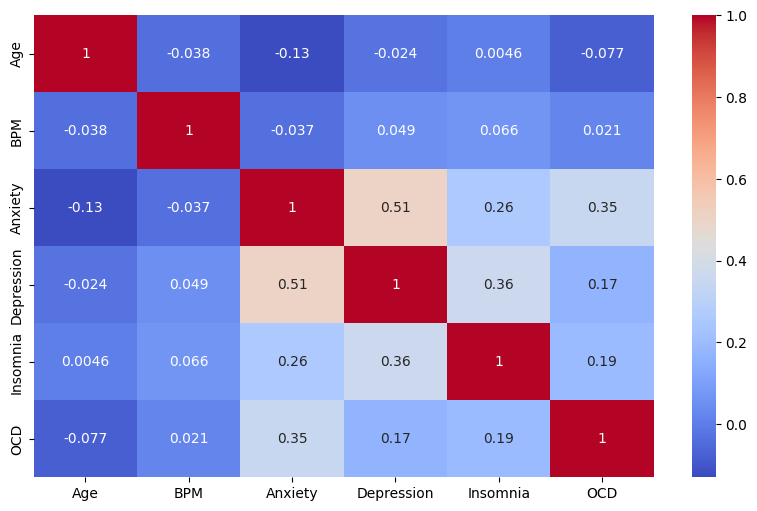

In [16]:
# Plot the heatmap  
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_survey, annot=True, cmap='coolwarm')
plt.show()

#### Finding of heatmap

There is a small correlation between the mental health columns of Anxiety and Depression. 

### Reviewing the findings of Anxiety and Depression

1. Started with a function to filter for Anxiety and Depression with a rating >= 6.0 for both.
2. Reviewed to see if there is a common favorite genre.

In [17]:
# Creating a filter for specific items anxiety and depression to check for top genres within these two mental health states since there is a correlation.

def filter_mental_health(df, column_name1, column_name2, number=6.0):
    """ Filtering by column genre to find the top song for that genre based on popular spotify data.
    
    Parameters:
    df = The DataFrame that houses the data
    column_name1 = one column that is being filtered
    column_name2 = second column that is being filtered
    genre = The genre to search
    number = The minimum number to be filtered for by column_name1 and column_name2
   
     Returns:
    pandas.DataFrame: A filtered DataFrame containing rows where the genre matches the given genre.
    """
    

    filtered_mental_health_genre = survey_sql_cleaned[(survey_sql_cleaned['Anxiety'] >= number) & (survey_sql_cleaned['Depression'] >= number)]
    return filtered_mental_health_genre

In [18]:
filter_mental_health(survey_sql_cleaned, 'Anxiety', "Depression")

,Age,Primarystreamingservice,Favgenre,BPM,Anxiety,Depression,Insomnia,OCD,Musiceffects
0,18.0,spotify,video game music,132.0,7.0,7.0,10.0,2.0,No effect
2,18.0,spotify,jazz,86.0,8.0,8.0,7.0,7.0,Improve
7,16.0,spotify,hip hop,103.0,8.0,8.0,4.0,3.0,Improve
11,17.0,spotify,rap,125.0,10.0,10.0,2.0,4.0,Improve
14,14.0,spotify,rock,136.0,8.0,6.0,10.0,5.0,Improve
...,...,...,...,...,...,...,...,...,...
393,16.0,spotify,pop,105.0,10.0,7.0,6.0,10.0,Improve
394,19.0,spotify,pop,78.0,6.0,6.0,8.0,0.0,Improve
395,13.0,spotify,video game music,128.0,10.0,10.0,8.0,4.0,Worsen
396,21.0,spotify,r&b,147.0,7.0,6.0,4.0,6.0,Improve


In [19]:
# Create dataframe
anx_dep_survey = filter_mental_health(survey_sql_cleaned, 'Anxiety', "Depression")

In [20]:
# Count how many times each genre appears
anx_dep_survey["Favgenre"].value_counts()

Favgenre
rock                49
pop                 23
metal               23
hip hop             13
classical            9
video game music     8
edm                  7
jazz                 7
r&b                  6
k pop                6
folk                 5
lofi                 4
rap                  3
country              2
Name: count, dtype: int64

#### Findings on Anxiety and Depression Review

For this dataset the genre that had the highest number is rock followed by pop and metal.

## Spotify Music Dataset

1. Read the csv for high popularity and low popularity into notebook.
2. Used DBBrowser for SQLite to perform a union of the two csv

In [21]:
# Create a dataframe for high popularity spotify
high_spotify = pd.read_csv("high_popularity_spotify_data.csv")

# Show first two lines
high_spotify.head(2)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.308,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.200,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [22]:
# Create a dataframe for low popularity spotify
low_spotify = pd.read_csv("low_popularity_spotify_data.csv")

# Show first two lines
low_spotify.head(2)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection


In [23]:
# using dbbrowser for sqlite combined high and low spotify using union

union_spotify = pd.read_csv('union_spotify.csv')

union_spotify.head(2)

,energy,tempo,danceability,liveness,valence,duration_ms,loudness,playlist_genre,track_name,track_artist,track_popularity,analysis_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lofi,Make It,Berhanio,50,NaN
1,0.000202,71.599,0.124,0.11,0.0346,186388.0,-43.713,ambient,Foundation,Matheo Lyon,61,https://api.spotify.com/v1/audio-analysis/15Tw...


### Clean the datasets
1. Checked for null values and removed

In [24]:
# check for additional isnull
union_spotify.isnull().any().any()

np.True_

In [25]:
# Check where null is located
union_spotify.isnull().sum()

energy              1
tempo               1
danceability        1
liveness            1
valence             1
duration_ms         1
loudness            1
playlist_genre      0
track_name          0
track_artist        0
track_popularity    0
analysis_url        1
dtype: int64

In [26]:
# cleaning dataset
union_spotify_clean = union_spotify.dropna().reset_index(drop=True)

union_spotify_clean.head(2)

,energy,tempo,danceability,liveness,valence,duration_ms,loudness,playlist_genre,track_name,track_artist,track_popularity,analysis_url
0,0.000202,71.599,0.124,0.11,0.0346,186388.0,-43.713,ambient,Foundation,Matheo Lyon,61,https://api.spotify.com/v1/audio-analysis/15Tw...
1,0.000237,73.664,0.172,0.11,0.0383,195466.0,-44.525,ambient,Reconcile,Jan Garlow,61,https://api.spotify.com/v1/audio-analysis/3ICe...


### Visualization Heatmap for Spotify

Checking for a correlation between the numeric fields of the spotify dataset. 

In [27]:
# Setting up for correlation matrix to see if there are any signficant correlations in union dataset for spotify
unioned_filtered_numeric = union_spotify_clean.select_dtypes(include=['number'])
# survey_filtered_numeric = survey_db_counts.select_dtypes(include=['number'])

# Correlation Matrix
corr_matrix = unioned_filtered_numeric.corr()

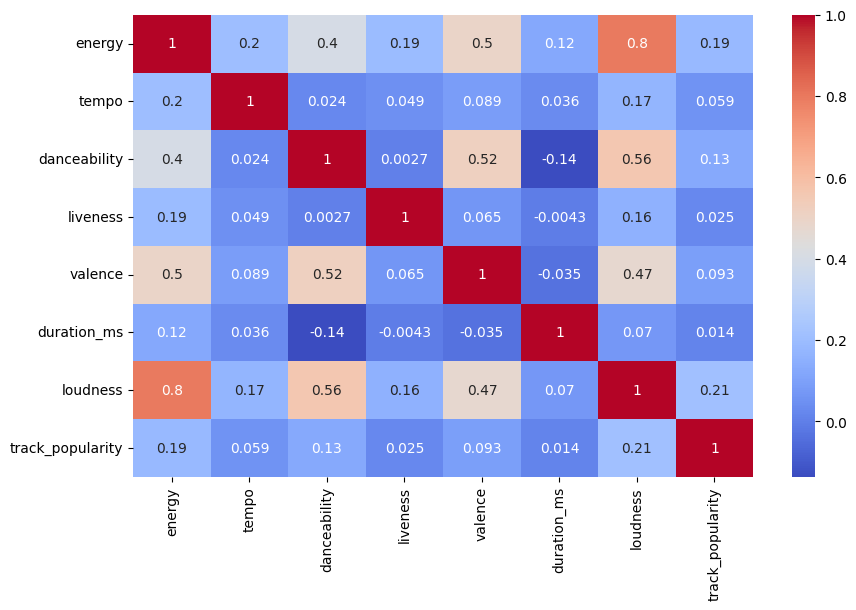

In [28]:
# Plot the heatmap  
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Heatmap findings

Energy and Loudness have a high correlation. Will check to see if this commonality is in most popular spotify songs. This is also interesting to note as one of the top genres is rock music.

### Additional Cleaning

1. Used DBBrowser for sqlite to keep columns that would show popular songs, titles, and artists.
2. Checked for any null values
3. Checked for duplicates and removed any found
4. Created a filter for a quick search of top song for genre

In [29]:
# used dbbrowser for sqlite to gather most popular song per genre
popular_songs_by_genre = pd.read_csv('max_popular_songs.csv')

In [30]:
# check first few rows
popular_songs_by_genre.head()

,playlist_genre,track_popularity,track_artist,track_popularity.1,track_name,analysis_url
0,pop,100,"Lady Gaga, Bruno Mars",100,Die With A Smile,https://api.spotify.com/v1/audio-analysis/2plb...
1,jazz,69,Nat King Cole,69,Unforgettable,https://api.spotify.com/v1/audio-analysis/648T...
2,classical,75,"Ludovico Einaudi, Daniel Hope, I Virtuosi Ital...",75,Experience,https://api.spotify.com/v1/audio-analysis/1Bnc...
3,hip-hop,92,"The Weeknd, Playboi Carti",92,Timeless (with Playboi Carti),https://api.spotify.com/v1/audio-analysis/1Es7...
4,afrobeats,78,Tyla,78,PUSH 2 START,https://api.spotify.com/v1/audio-analysis/1Cbl...


In [31]:
# any null values
popular_songs_by_genre.isnull().any().any()

np.False_

In [32]:
popular_songs_by_genre.head()

,playlist_genre,track_popularity,track_artist,track_popularity.1,track_name,analysis_url
0,pop,100,"Lady Gaga, Bruno Mars",100,Die With A Smile,https://api.spotify.com/v1/audio-analysis/2plb...
1,jazz,69,Nat King Cole,69,Unforgettable,https://api.spotify.com/v1/audio-analysis/648T...
2,classical,75,"Ludovico Einaudi, Daniel Hope, I Virtuosi Ital...",75,Experience,https://api.spotify.com/v1/audio-analysis/1Bnc...
3,hip-hop,92,"The Weeknd, Playboi Carti",92,Timeless (with Playboi Carti),https://api.spotify.com/v1/audio-analysis/1Es7...
4,afrobeats,78,Tyla,78,PUSH 2 START,https://api.spotify.com/v1/audio-analysis/1Cbl...


In [33]:
# Drop duplicates and create a new DataFrame
popular_songs_by_genre_no_duplicates = popular_songs_by_genre.drop_duplicates()

popular_songs_by_genre_clean = popular_songs_by_genre_no_duplicates

In [34]:
# Filtering for most popular song by genre in the spotify database (from sql csv)

def filter_by_genre(df, column_name, genre):
    """ Filtering by column genre to find the top song for that genre based on popular spotify data.
    
    Parameters:
    df = The DataFrame that houses the data
    column_name = column that is being filtered
    genre = The genre to search
   
     Returns:
    pandas.DataFrame: A filtered DataFrame containing rows where the genre matches the given genre.
    """
    

    filtered_popular_songs = popular_songs_by_genre_clean[popular_songs_by_genre_clean['playlist_genre'] == genre]
    return filtered_popular_songs

In [35]:
result_popular = filter_by_genre(popular_songs_by_genre, 'playlist_genre', 'rock')
result_popular

,playlist_genre,track_popularity,track_artist,track_popularity.1,track_name,analysis_url
20,rock,89,Linkin Park,89,The Emptiness Machine,https://api.spotify.com/v1/audio-analysis/2Pnl...


#### Prepping for merge 

Below code shows steps to prep for merge of the spotify dataset
1. Checking genre types
2. updating column names or genre names

In [36]:
# checking unique genre titles in spotify 

unique_spotify_genres = popular_songs_by_genre_clean['playlist_genre'].unique()

unique_spotify_genres

array(['pop', 'jazz', 'classical', 'hip-hop', 'afrobeats', 'latin',
       'indian', 'country', 'r&b', 'electronic', 'soul', 'gaming',
       'j-pop', 'metal', 'reggae', 'k-pop', 'arabic', 'rock', 'punk',
       'blues', 'folk', 'lofi', 'brazilian', 'turkish', 'ambient',
       'korean', 'world', 'indie'], dtype=object)

In [37]:
# setting up for merge of survey data base and spotify database by creating similar genre titles
survey_db_counts['Favgenre'] = survey_db_counts['Favgenre'].replace({
    'hip hop': 'hip-hop',
    'video game music': 'gaming'
})


In [38]:
# updating column name in survey dataset to match column in spotify 
survey_db_counts = survey_db_counts.rename(columns={'Favgenre': 'playlist_genre'})

In [39]:
# merge of survey and spotify datasets on playlist genre
merged_survey_spotify = pd.merge(survey_db_counts, popular_songs_by_genre_clean, on='playlist_genre')

In [40]:
merged_survey_spotify

,Primarystreamingservice,playlist_genre,improve_count,worsen_count,no_effect_count,total_count,improve_percentage,worsen_percentage,no_effect_percentage,track_popularity,track_artist,track_popularity.1,track_name,analysis_url
0,spotify,classical,17,1,7,25,68.000000,4.00,28.00,75,"Ludovico Einaudi, Daniel Hope, I Virtuosi Ital...",75,Experience,https://api.spotify.com/v1/audio-analysis/1Bnc...
1,spotify,country,12,0,3,15,80.000000,0.00,20.00,73,Kenny Rogers,73,The Gambler,https://api.spotify.com/v1/audio-analysis/5Kql...
2,spotify,folk,15,0,5,20,75.000000,0.00,25.00,93,Gigi Perez,93,Sailor Song,https://api.spotify.com/v1/audio-analysis/2262...
3,spotify,hip-hop,26,0,2,28,92.857143,0.00,7.14,92,"The Weeknd, Playboi Carti",92,Timeless (with Playboi Carti),https://api.spotify.com/v1/audio-analysis/1Es7...
4,spotify,jazz,13,0,2,15,86.666667,0.00,13.33,69,Nat King Cole,69,Unforgettable,https://api.spotify.com/v1/audio-analysis/648T...
5,spotify,latin,0,0,1,2,0.000000,0.00,50.00,93,"Oscar Maydon, Fuerza Regida",93,Tu Boda,https://api.spotify.com/v1/audio-analysis/1cOb...
6,spotify,latin,0,0,1,2,0.000000,0.00,50.00,93,KAROL G,93,Si Antes Te Hubiera Conocido,https://api.spotify.com/v1/audio-analysis/6Wat...
7,spotify,lofi,8,0,0,8,100.000000,0.00,0.00,73,"Kina, Snøw",73,Get You The Moon (feat. Snøw),https://api.spotify.com/v1/audio-analysis/4ZLz...
8,spotify,metal,49,0,12,61,80.327869,0.00,19.67,83,System Of A Down,83,Chop Suey!,https://api.spotify.com/v1/audio-analysis/2DlH...
9,spotify,pop,52,2,14,68,76.470588,2.94,20.59,100,"Lady Gaga, Bruno Mars",100,Die With A Smile,https://api.spotify.com/v1/audio-analysis/2plb...


In [41]:
# Create new column from merged dataframes
merged_survey_spotify['effectiveness'] = (merged_survey_spotify['improve_count'] / merged_survey_spotify['total_count'] * 100).round(2)


In [48]:
# drop repeated column from merged dataframes
merged_survey_spotify.drop('track_popularity.1', axis=1)

,Primarystreamingservice,playlist_genre,improve_count,worsen_count,no_effect_count,total_count,improve_percentage,worsen_percentage,no_effect_percentage,track_popularity,track_artist,track_name,analysis_url,effectiveness
0,spotify,classical,17,1,7,25,68.000000,4.00,28.00,75,"Ludovico Einaudi, Daniel Hope, I Virtuosi Ital...",Experience,https://api.spotify.com/v1/audio-analysis/1Bnc...,68.00
1,spotify,country,12,0,3,15,80.000000,0.00,20.00,73,Kenny Rogers,The Gambler,https://api.spotify.com/v1/audio-analysis/5Kql...,80.00
2,spotify,folk,15,0,5,20,75.000000,0.00,25.00,93,Gigi Perez,Sailor Song,https://api.spotify.com/v1/audio-analysis/2262...,75.00
3,spotify,hip-hop,26,0,2,28,92.857143,0.00,7.14,92,"The Weeknd, Playboi Carti",Timeless (with Playboi Carti),https://api.spotify.com/v1/audio-analysis/1Es7...,92.86
4,spotify,jazz,13,0,2,15,86.666667,0.00,13.33,69,Nat King Cole,Unforgettable,https://api.spotify.com/v1/audio-analysis/648T...,86.67
5,spotify,latin,0,0,1,2,0.000000,0.00,50.00,93,"Oscar Maydon, Fuerza Regida",Tu Boda,https://api.spotify.com/v1/audio-analysis/1cOb...,0.00
6,spotify,latin,0,0,1,2,0.000000,0.00,50.00,93,KAROL G,Si Antes Te Hubiera Conocido,https://api.spotify.com/v1/audio-analysis/6Wat...,0.00
7,spotify,lofi,8,0,0,8,100.000000,0.00,0.00,73,"Kina, Snøw",Get You The Moon (feat. Snøw),https://api.spotify.com/v1/audio-analysis/4ZLz...,100.00
8,spotify,metal,49,0,12,61,80.327869,0.00,19.67,83,System Of A Down,Chop Suey!,https://api.spotify.com/v1/audio-analysis/2DlH...,80.33
9,spotify,pop,52,2,14,68,76.470588,2.94,20.59,100,"Lady Gaga, Bruno Mars",Die With A Smile,https://api.spotify.com/v1/audio-analysis/2plb...,76.47


## Visualization of Popular Songs

Using coding below to plot waveforms of popular song to check for any similarity between the waves.
1. Loading audio files
2. Creating function for waveforms
    - utilize multiple resources to learn how to plot waveforms and understand the terms specifically: https://docs.python.org/3/library/wave.html

In [42]:

# Function to read audio file as binary data
def read_audio_file(file_path):
    with open(file_path, 'rb') as f:
        return f.read()


folder_path = 'wav_files'

# List all .wav files in the folder
audio_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.wav')]

# Your existing code
file_names = []
audio_data = []

for path in audio_paths:
    print(f"Reading file: {path}")  # Print the path to debug
    file_names.append(path)
    audio_data.append(read_audio_file(path))



Reading file: wav_files/hip_hop.wav
Reading file: wav_files/country.wav
Reading file: wav_files/classical.wav
Reading file: wav_files/rock.wav
Reading file: wav_files/metal.wav
Reading file: wav_files/NatKingColeNatalie-Unforgetable.wav
Reading file: wav_files/r&b.wav
Reading file: wav_files/latin.wav
Reading file: wav_files/lofi.wav
Reading file: wav_files/folk.wav
Reading file: wav_files/jazz.wav
Reading file: wav_files/pop.wav


In [43]:
# Following along with youtube videos and through various websites

def waveform(df, audiofile):
    """
    Generates and plots the waveform of an audio file.

    This function filters an audio file based on its name and generates a 
    waveform for the selected audio file.

    Parameters:
    df (pandas.DataFrame): The DataFrame that houses the data, typically containing audio file paths.
    audiofile (str): The name of the audio file to be processed.

    Returns:
    None: This function plots the waveform of the audio file.
    """

    # Ensure the audiofile exists in the DataFrame
    if audiofile not in df['audio_file'].values:
        print(f"{audiofile} not found in the DataFrame!")
        return

   
    file_path = df.loc[df['audio_file'] == audiofile, 'audio_file'].values[0]

    # Check if the file is correct type
    if not audiofile.lower().endswith('.wav'):
        print("This function currently only handles WAV files.")
        return
    
    # Load the audio file
    try:
        with wave.open(file_path, 'rb') as wav_file:
            # Get parameters 
            parameters = wav_file.getparams()
            number_channels = parameters[0]
            sample_width = parameters[1]
            frame_rate = parameters[2]
            number_frames = parameters[3]
            
            # Reading the audio frames
            audio_data = wav_file.readframes(number_frames)
            
            # Convert audio data to numpy array
            audio_array = np.frombuffer(audio_data, dtype=np.int16)

    except Exception as e:
        print(f"Error loading audio file {audiofile}: {e}")
        return

    # If stereo (2 channels), split the channels
    if number_channels == 2:
       audio_array = audio_array[::2]  

    # Time axis for plotting (in seconds)
    time = np.linspace(0, number_frames / frame_rate, num=number_frames)

    # Plot the waveform
    plt.figure(figsize=(8, 2))
    plt.plot(time, audio_array)
    plt.title(f"Waveform of {audiofile}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()



audio_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.wav')]

# Create a DataFrame with the paths of the audio files
audio_popular = pd.DataFrame({'audio_file': audio_paths})




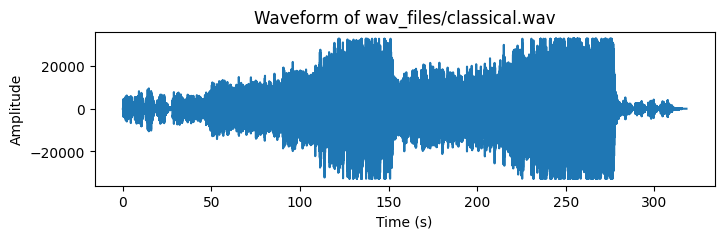

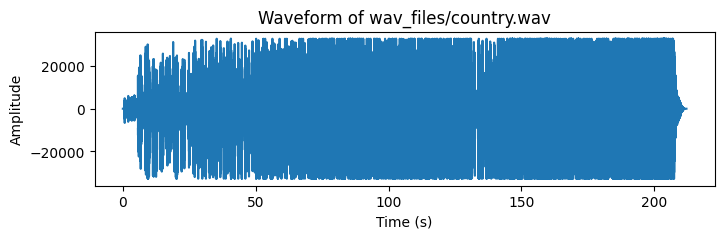

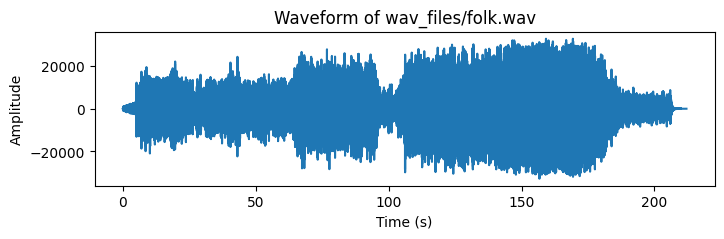

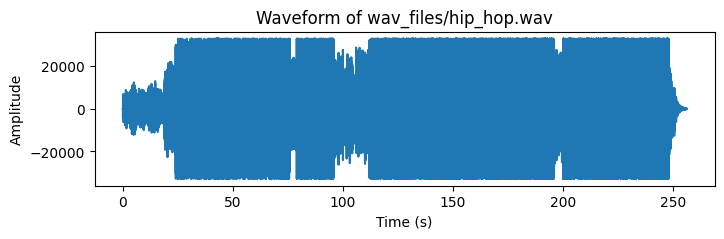

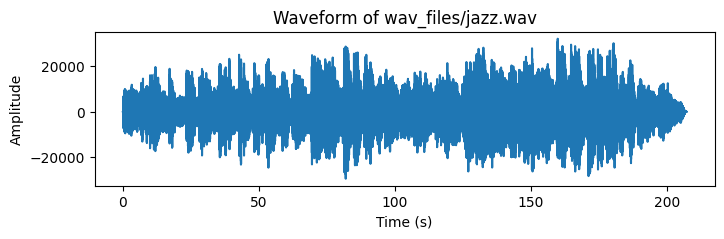

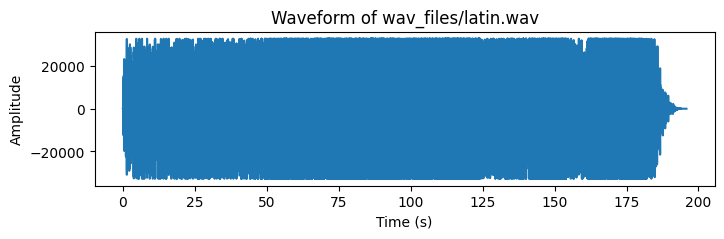

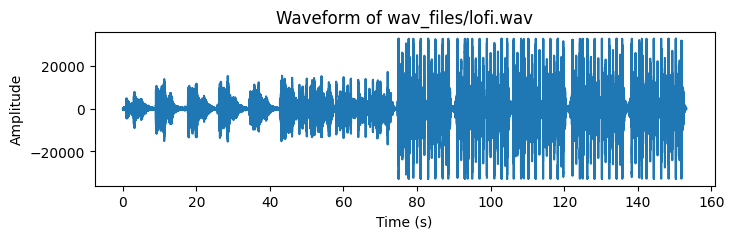

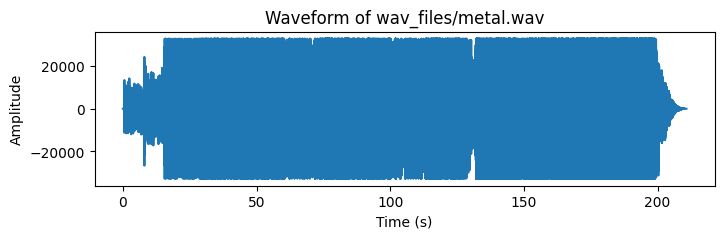

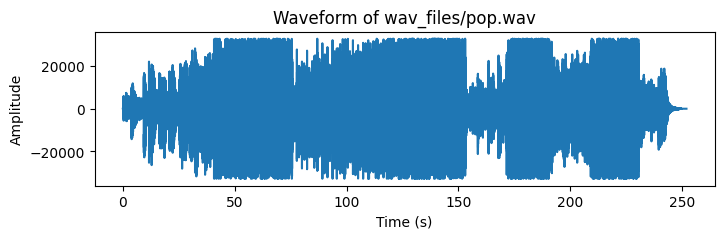

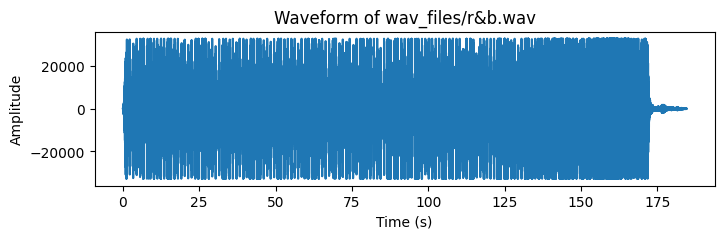

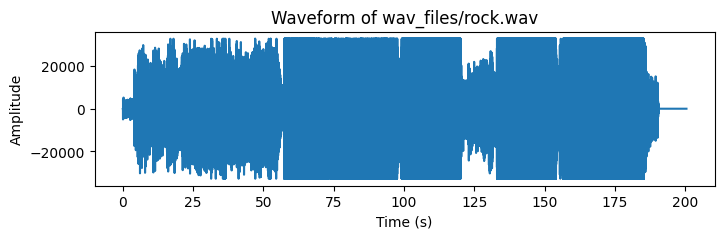

In [44]:
# plotting most popular by genre on spotify waveforms on songs to check if any similarities in music
waveform(audio_popular, 'wav_files/classical.wav')
waveform(audio_popular, 'wav_files/country.wav')
waveform(audio_popular, 'wav_files/folk.wav')
waveform(audio_popular, 'wav_files/hip_hop.wav')
waveform(audio_popular, 'wav_files/jazz.wav')
waveform(audio_popular, 'wav_files/latin.wav')
waveform(audio_popular, 'wav_files/lofi.wav')
waveform(audio_popular, 'wav_files/metal.wav')
waveform(audio_popular, 'wav_files/pop.wav')
waveform(audio_popular, 'wav_files/r&b.wav')
waveform(audio_popular, 'wav_files/rock.wav')

The Waveform plots do not show significant similarities between the various popular genres

### Visualizations via Bar Plot
Generated bar plots to see survey results via percentages and total count

In [45]:
# Create a function for plotting bar graphs
def bar(df, x, y):
    """Generates and plots the bar plot of percentages by playlist_genre.

    This function generates a bar plot based on x being playlist genre and y being percentage.

    Parameters:
    df (pandas.DataFrame): The DataFrame that houses the data, containing percentages and playlist genre
    

    Returns:
    None: This function plots the bar."""

# Plotting Improve Percentage by Playlist Genre
    plt.figure(figsize=(8, 4))
    sns.barplot(x=x, y=y, data=df, palette='viridis', hue=x, legend=False)  
    plt.title(f'{y} by {x}')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

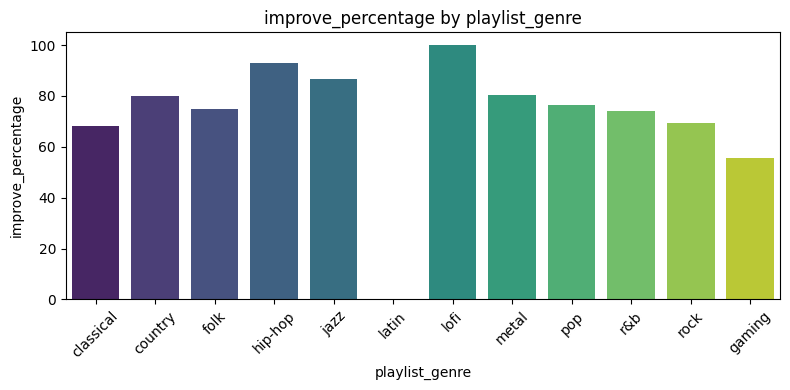

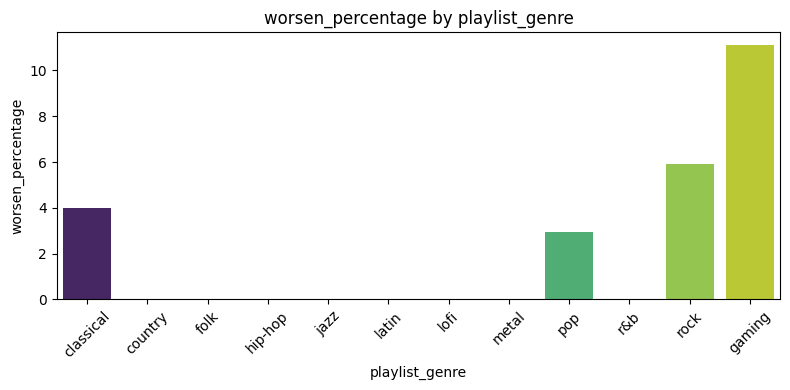

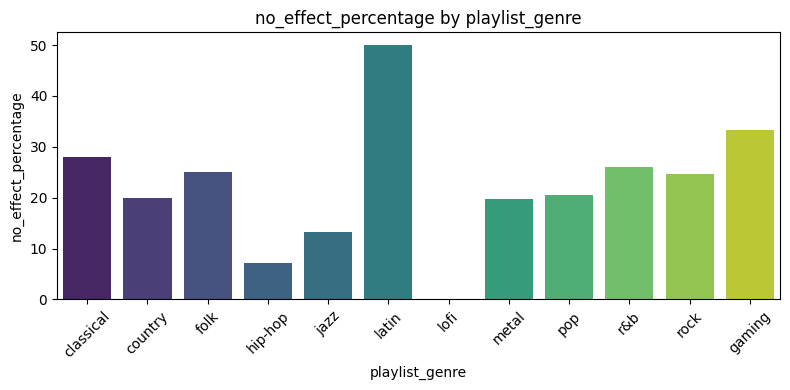

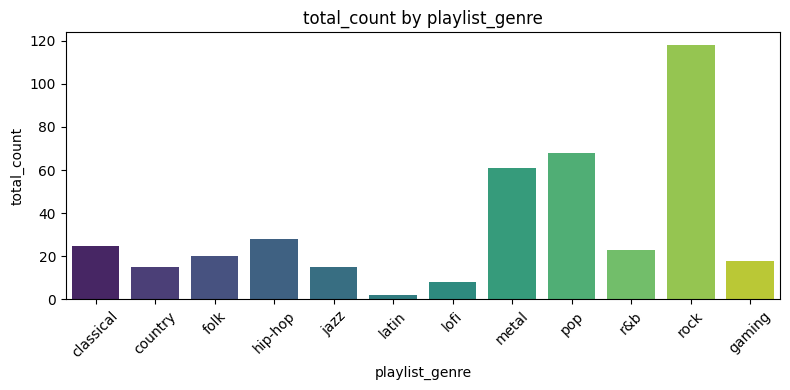

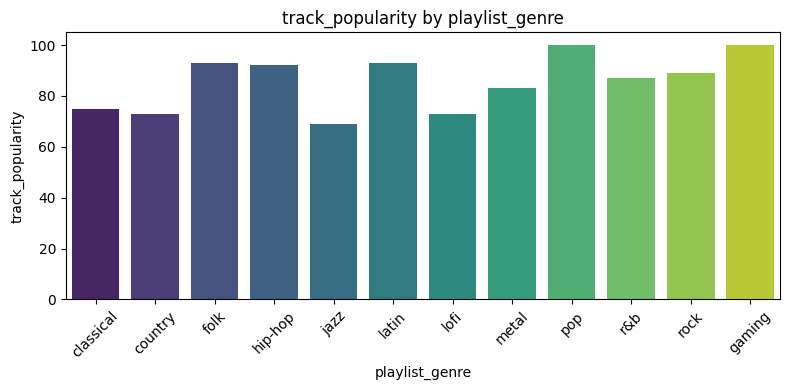

In [46]:
bar(merged_survey_spotify, 'playlist_genre', 'improve_percentage')
bar(merged_survey_spotify, 'playlist_genre', 'worsen_percentage')
bar(merged_survey_spotify, 'playlist_genre', 'no_effect_percentage')
bar(merged_survey_spotify, 'playlist_genre', 'total_count')
bar(merged_survey_spotify, 'playlist_genre', 'track_popularity')

### Most Popular by genre on spotify 

Please click the link Github Page below if viewing in github if you would like access to the audio files to listen to the top songs by genre

[Github Music Audio Page](https://luckycarms.github.io/music_audio/)


- Classical *Experience, Ludovico Einaudi*


 <audio controls>
        <source src="classical.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Country *The Gambler, Kenny Rogers*

<audio controls>
        <source src="country.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Folk *Sailor Song, Gigi Perez*

<audio controls>
        <source src="folk.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Hip Hop *Timeless, The Weeknd, Playboi Carti*

<audio controls>
        <source src="hip_hop.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Jazz *Unforgettable, Nat King Cole*

<audio controls>
        <source src="jazz.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Latin *Si antes te hubiera conocido, Karol G* (could only locate one of the two latin songs)

<audio controls>
        <source src="latin.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Lofi *Get you the Moon, Kina feat Snow* (Trigger Warning)

<audio controls>
        <source src="lofi.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Metal *Chop Suey, System of a down* (Trigger Warning)

<audio controls>
        <source src="metal.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Pop and Gaming: both had score of 100 *Die with a Smile, Lady Gaga and Bruno Mars*

<audio controls>
        <source src="pop.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- R&B *Pink + White, Frank Ocean*

<audio controls>
        <source src="r&b.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


- Rock *The Emptiness Machine, Linkin Park* 

<audio controls>
        <source src="rock.wav" type="audio/wav">
        Your browser does not support the audio element.
      </audio>


## Conclusion

Does music help to improve mental health/mood?
- Findings show that it does

Is there one genre that statistically is best for improving mental health/mood?
- Findings show that there is not one genre that is better than another. It appears that whatever music is your favorite will help to improve your mental health/mood.

Main Take-Away:
- In conclusion, music has a positive impact on mental health and mood. However, when it comes to identifying a specific genre that is most effective, the findings suggest that there is no one-size-fits-all answer. Instead, the most significant factor in improving mental health and mood is personal preference. Listening to music that aligns with your individual tastes and emotional needs appears to be the key to reaping the greatest benefits, regardless of genre.


### Future Recommendations and Limitations

1. One main limitation is that in using the Spotify dataset I was unable to use other streamining services in the survey dataset. Having a larger survey dataset may have provided additional information.

2. A recommendation is to look further into Anxiety and Depression, and analyzing the top genre associated with them.

3. A recommendation is to look further into Loudness and Energy as there was a small correlation between these two types, which I noted earlier that Rock music being popular could be interesting to review.
